In [1]:
from coba.benchmarks import Result
full_2 = Result.from_file("./outcomes/full_2.log").filter_sim().filter_fin()

In [2]:
full_2

{'Learners': 3, 'Simulations': 52, 'Interactions': 1560000}

In [12]:
#interactions = full_2.interactions.to_pandas()
#simulations  = full_2.simulations.to_pandas()

from collections import Counter

Counter(simulations["action_cardinality"].tolist())

Counter({9: 4,
         10: 3,
         2: 111,
         11: 1,
         5: 5,
         3: 9,
         4: 3,
         7: 5,
         8: 1,
         16: 1,
         26: 1})

In [4]:
import pandas as pd

rwd_df = interactions[["simulation_id", "learner_id", "reward"]].groupby(['simulation_id','learner_id']).agg("mean").reset_index()
idx_df = rwd_df.groupby(['simulation_id']).idxmax()
max_df = rwd_df.iloc[idx_df["reward"]].reset_index(drop=True)

max_df['learner_id'].value_counts()

0    31
1    13
2     8
Name: learner_id, dtype: int64

In [6]:
import pandas as pd

rwd_df = interactions.query("learner_id!=2")[["simulation_id", "learner_id", "reward"]].groupby(['simulation_id','learner_id']).agg("mean").reset_index()
idx_df = rwd_df.groupby(['simulation_id']).idxmax()
max_df = rwd_df.iloc[idx_df["reward"]].reset_index(drop=True)

max_df['learner_id'].value_counts()

0    96
1    48
Name: learner_id, dtype: int64

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics.pairwise import rbf_kernel, euclidean_distances
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

rwd_df = interactions.query("learner_id!=2")[["simulation_id", "learner_id", "reward"]].groupby(['simulation_id','learner_id']).agg("mean").reset_index()
idx_df = rwd_df.groupby(['simulation_id']).idxmax()
max_df = rwd_df.iloc[idx_df["reward"]].reset_index(drop=True)

X = pd.merge(simulations, max_df, on="simulation_id")[["action_cardinality", "bayes_rate", "context_dimensions", "imbalance_ratio"]].to_numpy()
X = normalize(X, axis=0)
Y = pd.merge(simulations, max_df, on="simulation_id")[["learner_id"]].to_numpy().squeeze()
D = euclidean_distances(X,X)

L = { 0:"VW"  , 1:"CMT"}
C = { 0:"blue", 1:"red"}

X = TSNE(perplexity=30,learning_rate=400,metric="precomputed", square_distances=True).fit_transform(D)

for y in set(Y):
    plt.scatter(X[Y==y,0], X[Y==y,1], label=L[y], marker="o", c=C[y], alpha=0.5)

plt.legend()
plt.show()


KeyboardInterrupt: 

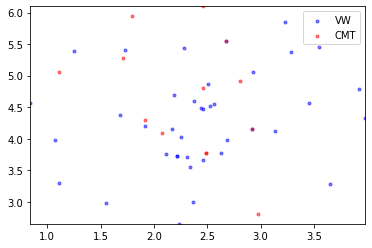

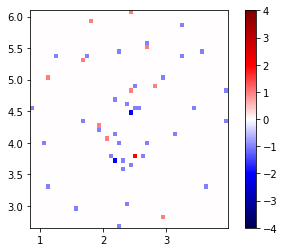

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics.pairwise import rbf_kernel, euclidean_distances, polynomial_kernel
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

rwd_df = interactions.query("learner_id!=2")[["simulation_id", "learner_id", "reward"]].groupby(['simulation_id','learner_id']).agg("mean").reset_index()
idx_df = rwd_df.groupby(['simulation_id']).idxmax()
max_df = rwd_df.iloc[idx_df["reward"]].reset_index(drop=True)

X = pd.merge(simulations, max_df, on="simulation_id")[["action_cardinality", "bayes_rate", "context_dimensions", "imbalance_ratio"]].to_numpy()
X = normalize(X, axis=0)
X = normalize(X, axis=1)
Y = pd.merge(simulations, max_df, on="simulation_id")[["learner_id"]].to_numpy().squeeze()
D = rbf_kernel(X,X,100)

L = { 0:"VW", 1:"CMT"}
C = { 0:"blue", 1:"red"}

X = TSNE(perplexity=5,learning_rate=75, metric="precomputed", square_distances=True).fit_transform(D)

heatmap_0, xedges, yedges = np.histogram2d(X[Y==0,0], X[Y==0,1], range=[[min(X[:,0]), max(X[:,0])],[min(X[:,1]), max(X[:,1])]], bins=50)
heatmap_1, xedges, yedges = np.histogram2d(X[Y==1,0], X[Y==1,1], range=[[min(X[:,0]), max(X[:,0])],[min(X[:,1]), max(X[:,1])]], bins=50)

heatmap = heatmap_1-heatmap_0
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

for y in [0,1]:
    plt.scatter(X[Y==y,0], X[Y==y,1], label=L[y], c=C[y], marker=".", alpha=0.5)
    
plt.xlim(extent[0:2])
plt.ylim(extent[2:4])
plt.legend()
plt.show()

v_abs_max = abs(heatmap).max() + 2

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap="seismic", vmin=-v_abs_max, vmax=v_abs_max, alpha=1)
plt.colorbar()
plt.show()
